# Datos del titanic

In [2]:
import seaborn as sns

In [3]:
titanic = sns.load_dataset("titanic")

In [11]:
titanic. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(6), float64(2), int64(2), object(3)
memory usage: 56.8+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic.shape # Muestra cuantos registros hay en el dataframe

(891, 15)

In [124]:
# Carga de librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
titanic['survived'] = pd.Categorical(titanic['survived'])
titanic['pclass'] = pd.Categorical(titanic['pclass'])
titanic['sex'] = pd.Categorical(titanic['sex'])
titanic['embarked'] = pd.Categorical(titanic['embarked'])

## Tablas de contingencia de una variable

Cantidad de pasajeros que sobrevivieron y cuales lamentablemente fallecieron, siendo `survived = 1` los que sobrevivieron y `survived = 0` los que fallecieron.

In [167]:
tab_survived = pd.crosstab(index = titanic['survived'],
                           columns = 'pasajeros')
tab_survived.index = ['Murió', 'Sobrevivió']
print(tab_survived)
tab_surv_rel = tab_survived/tab_survived.sum()
tab_surv_rel

col_0       pasajeros
Murió             549
Sobrevivió        342


col_0,pasajeros
Murió,0.616162
Sobrevivió,0.383838


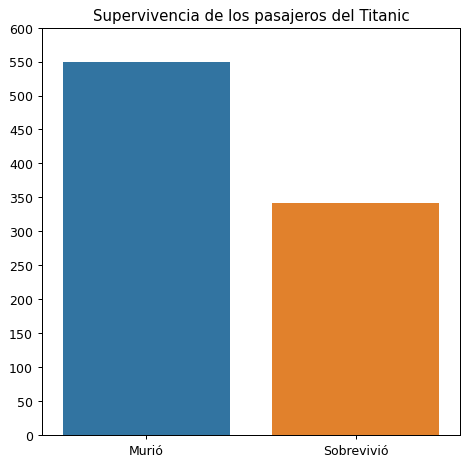

In [209]:
plt.figure(figsize = (6,6), dpi=(90))
sns.barplot(x = list(tab_survived['pasajeros'].index),
           y = list(tab_survived['pasajeros'].values))
plt.title('Supervivencia de los pasajeros del Titanic')
plt.yticks(np.arange(0,650,50))
plt.show()

In [205]:
np.arange(0,600,20)

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500,
       520, 540, 560, 580])

<AxesSubplot:>

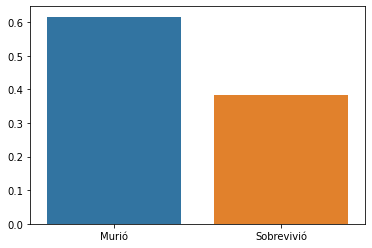

In [169]:
sns.barplot(x = list(tab_surv_rel['pasajeros'].index),
           y = list(tab_surv_rel['pasajeros'].values))

Cantidad de pasajeros que viajaban en cada clase

In [35]:
tab_class = pd.crosstab(index = titanic['pclass'],
           columns = 'pasajeros')
print(tab_class)
tab_class/tab_class.sum()

col_0   pasajeros
pclass           
1             216
2             184
3             491


col_0,pasajeros
pclass,
1,0.242424
2,0.206510
3,0.551066


Cantidad de hombres y mujeres que viajaban en el titanic

In [36]:
tab_sex = pd.crosstab(index = titanic['sex'],
           columns = 'pasajeros')
print(tab_sex)
tab_sex/tab_sex.sum()

col_0   pasajeros
sex              
female        314
male          577


col_0,pasajeros
sex,
female,0.352413
male,0.647587


Cantidad de pasajeros según la cubierta en la que viajaban del titanic

In [20]:
tab_deck = pd.crosstab(titanic['deck'],
           columns = 'count')

In [21]:
tab_deck

col_0,count
deck,
A,15
B,47
C,59
D,33
E,32
F,13
G,4


In [22]:
tab_deck.sum()

col_0
count    203
dtype: int64

In [23]:
tab_deck.shape

(7, 1)

In [25]:
tab_deck.iloc[1:4]

col_0,count
deck,
B,47
C,59
D,33


In [26]:
tab_deck/tab_deck.sum()

col_0,count
deck,
A,0.073892
B,0.231527
C,0.290640
D,0.162562
E,0.157635
F,0.064039
G,0.019704


# Tablas de contingencia de dos variables 

In [39]:
survived_sex = pd.crosstab(index = titanic['survived'],
                          columns = titanic['sex'])
survived_sex.index = ['died', 'survived']
survived_sex

sex,female,male
died,81,468
survived,233,109


In [52]:
survived_class = pd.crosstab(index = titanic['survived'],
                            columns = titanic['class'],
                            margins = True)
survived_class.index = ['Murió', 'Sobrevivió', 'total_columnas']
survived_class.columns = ['Primera', 'Segunda', 'Tercera', 'total_filas']
survived_class

,Primera,Segunda,Tercera,total_filas
Murió,80,97,372,549
Sobrevivió,136,87,119,342
total_columnas,216,184,491,891


### Frecuencias relativas globales

In [53]:
round(survived_class/survived_class.loc['total_columnas', 'total_filas'],3)

,Primera,Segunda,Tercera,total_filas
Murió,0.090,0.109,0.418,0.616
Sobrevivió,0.153,0.098,0.134,0.384
total_columnas,0.242,0.207,0.551,1.000


### Frecuecnias relativas marginales

#### Frecuencias marginales por columnas

In [54]:
survived_class/survived_class.loc['total_columnas'] 

,Primera,Segunda,Tercera,total_filas
Murió,0.37037,0.527174,0.757637,0.616162
Sobrevivió,0.62963,0.472826,0.242363,0.383838
total_columnas,1.00000,1.000000,1.000000,1.000000


In [56]:
survived_class.div(survived_class.loc['total_columnas'], axis = 1)

,Primera,Segunda,Tercera,total_filas
Murió,0.37037,0.527174,0.757637,0.616162
Sobrevivió,0.62963,0.472826,0.242363,0.383838
total_columnas,1.00000,1.000000,1.000000,1.000000


#### Frecuencias marginales por filas

In [55]:
survived_class.div(survived_class['total_filas'], axis = 0)

,Primera,Segunda,Tercera,total_filas
Murió,0.145719,0.176685,0.677596,1.0
Sobrevivió,0.397661,0.254386,0.347953,1.0
total_columnas,0.242424,0.206510,0.551066,1.0


### Tablas multidimensionales

In [57]:
surv_sex_class = pd.crosstab(index = titanic['survived'],
                            columns = [titanic['sex'], titanic['pclass']],
                            margins = True)
surv_sex_class

sex      female          male            All
pclass        1   2    3    1    2    3     
survived                                    
0             3   6   72   77   91  300  549
1            91  70   72   45   17   47  342
All          94  76  144  122  108  347  891

#### Frecuencias relativas marginales por filas

In [60]:
surv_sex_class.div(surv_sex_class.loc['All'], axis = 1)

sex         female                     male                           All
pclass           1         2    3         1         2         3          
survived                                                                 
0         0.031915  0.078947  0.5  0.631148  0.842593  0.864553  0.616162
1         0.968085  0.921053  0.5  0.368852  0.157407  0.135447  0.383838
All       1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000

#### Frecuencias relativas marginales por columnas

In [64]:
surv_sex_class.div(surv_sex_class['All'], axis = 0)

sex         female                          male                      All
pclass           1         2         3         1         2         3     
survived                                                                 
0         0.005464  0.010929  0.131148  0.140255  0.165756  0.546448  1.0
1         0.266082  0.204678  0.210526  0.131579  0.049708  0.137427  1.0
All       0.105499  0.085297  0.161616  0.136925  0.121212  0.389450  1.0

In [68]:
round(surv_sex_class.div(surv_sex_class['All'], axis = 0),3)

sex      female                 male                All
pclass        1      2      3      1      2      3     
survived                                               
0         0.005  0.011  0.131  0.140  0.166  0.546  1.0
1         0.266  0.205  0.211  0.132  0.050  0.137  1.0
All       0.105  0.085  0.162  0.137  0.121  0.389  1.0